                                        California House Pricing Dataset Prediction Analysis

This is the fisrst project of Naviotech Training Program. This projects is based oon the California House Pricing Dataset.  
This is based on 1990 Census data and is mainly based on the regression problems. 

The prediction is basically made on 8 features: 
1. Median income 
2. House Age  
3. Average number of rooms pper household 
4. Average bedrooms 
5. Block group population 
6. Average House occupancy 
7. Latitude 
8. Longitude 

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import fetch_california_housing 

In [3]:
# Loading the dataset 
data = fetch_california_housing(as_frame = True) 
data 

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [4]:
x = data.data  # these are the features 
x 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y = data.target 
y 
# These are basically the labels 

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [6]:
# concatenating the whole data in the form of a clean table 
df= pd.concat([data.data, data.target.rename('MedHouseVal')], axis = 1) 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
# Now, we will train, test and split the model 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42) 

In [8]:
x_train # Model on which the data is trained  

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [9]:
x_test # Data on which the data is tested 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [10]:
y_train # data on which the model is trained 

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

In [11]:
y_test # data on whch the model is tested 

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [23]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators =  500, random_state = 42, n_jobs = -1) # n-jobs basically mean to use all the cpu cores available

regressor = model.fit(x_train, y_train) 
regressor 

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = regressor.predict(x_test) 
y_pred 

array([0.493186  , 0.74204   , 4.87733284, ..., 4.81367084, 0.710044  ,
       1.685112  ], shape=(4128,))

As, we can see that after making all the analysis on the dataset, we have to evaluate the whole model by making some more evaluations. 

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred) 

print("Mean Absolute error: ", mae) 
print("Mean squared Error: ", mse) 
print("Root Mean Squared error: ", rmse) 
print("R2 Score: ", r2) 

# Here the R2 score is 0.807 which means that the accuraccy is about 80 percent 

Mean Absolute error:  0.32580401166182155
Mean squared Error:  0.2520098930049716
Root Mean Squared error:  0.5020058694925504
R2 Score:  0.8076860757293718


C:\Users\91981\AppData\Local\Temp\ipykernel_32092\2585225121.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


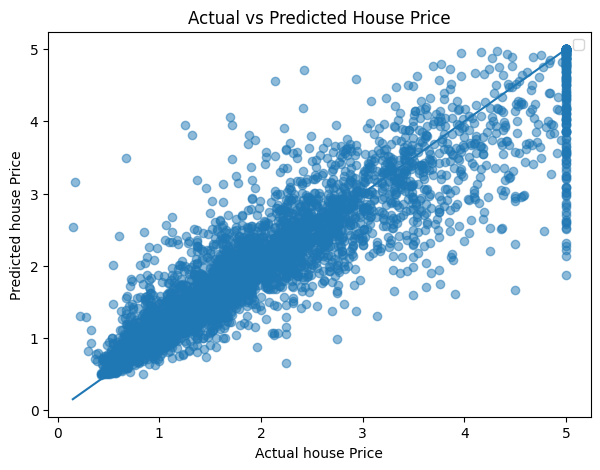

In [30]:
# Plotting the graph using the matplotlib 
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))  

plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.xlabel("Actual house Price") 
plt.ylabel("Predicted house Price") 
plt.title("Actual vs Predicted House Price") 
plt.legend() 
plt.show() 

C:\Users\91981\AppData\Local\Temp\ipykernel_32092\711690512.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


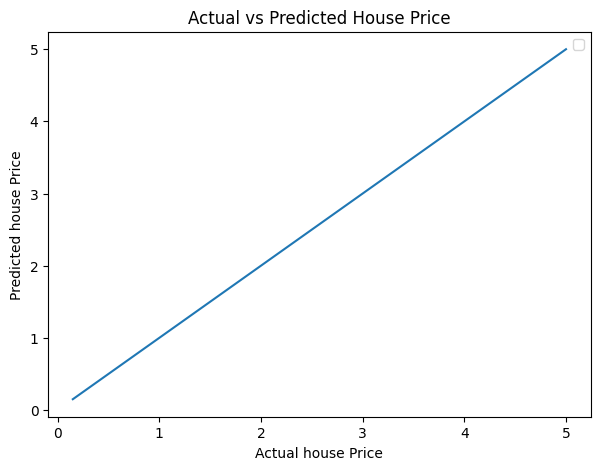

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))  


plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.xlabel("Actual house Price") 
plt.ylabel("Predicted house Price") 
plt.title("Actual vs Predicted House Price") 
plt.legend() 
plt.show() 

Here, as in the above diagrams we can see that the points are very close to the line on a very good model. 

                                               Now we will do the prediction on a new data 

In [32]:
sample_house = [[
    8.3252,   # MedInc
    41.0,     # HouseAge
    6.9841,   # AveRooms
    1.0238,   # AveBedrms
    322.0,    # Population
    2.5556,   # AveOccup
    37.88,    # Latitude
    -122.23   # Longitude
]] 
prediction = regressor.predict(sample_house) 

print("Predicted House Price (in $100,000s): ", prediction[0]) 


Predicted House Price (in $100,000s):  3.6024841599999955


So, according to the prediction 1: 100,000 $ 

So, the prediction comes to be : $ 422249.8